<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Ibm-datascience/blob/main/paired_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dem_votes = pd.read_feather('/content/dem_votes_potus_12_16.feather')
print(dem_votes)

       state       county  dem_percent_12  dem_percent_16
0    Alabama      Bullock       76.305900       74.946921
1    Alabama      Chilton       19.453671       15.847352
2    Alabama         Clay       26.673672       18.674517
3    Alabama      Cullman       14.661752       10.028252
4    Alabama     Escambia       36.915731       31.020546
..       ...          ...             ...             ...
495  Wyoming        Uinta       19.065464       14.191263
496  Wyoming     Washakie       20.131846       13.948610
497   Alaska   District 3       33.514582       16.301064
498   Alaska  District 18       61.284271       52.810051
499   Alaska  District 24       42.913980       39.405286

[500 rows x 4 columns]


In [3]:
#To calculate the difference between the votes in 2012 and 2016

dem_votes['diff'] = dem_votes['dem_percent_12'] - dem_votes['dem_percent_16']
print(dem_votes.head())

     state    county  dem_percent_12  dem_percent_16      diff
0  Alabama   Bullock       76.305900       74.946921  1.358979
1  Alabama   Chilton       19.453671       15.847352  3.606319
2  Alabama      Clay       26.673672       18.674517  7.999155
3  Alabama   Cullman       14.661752       10.028252  4.633500
4  Alabama  Escambia       36.915731       31.020546  5.895185


In [4]:
#The mean of the diff(xbar)
xbar_diff = dem_votes['diff'].mean()
print(xbar_diff)

6.829312660106834


5.040139140132317


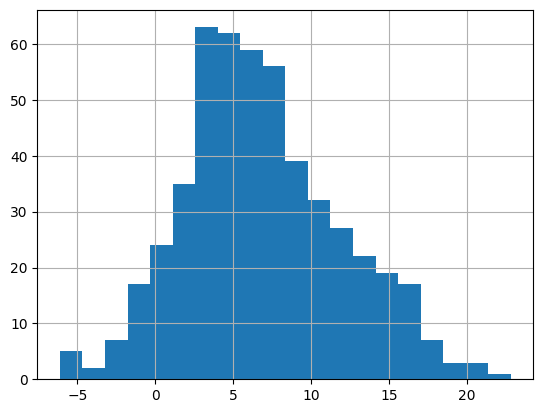

In [7]:
#The std of the diff
diff_std = dem_votes['diff'].std()
print(diff_std)

#Visulaize

dem_votes['diff'].hist(bins=20)
plt.show()

In [13]:
#Calulating the paired t_test
!pip install pingouin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=e5902e8ddb2bdcdb75be3bb40ec87a67ec87f9cac6eff53a285a3a0f36f69946
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils



### Ho: The proportion of democratic votes in 2012 and 2016 were the same.
### Ha: The proportion of democratic votes in 2012 and 2016 were different.



In [14]:
import pingouin
#conducting ttest on difference
test_results = pingouin.ttest(x=dem_votes['diff'], y=0,alternative ='two-sided')
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


Decision: if alpha is 0.01, i will reject null hypothesis

In [15]:
# Conducting a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=dem_votes['dem_percent_12'],y=dem_votes['dem_percent_16'],paired=True, alternative='two-sided')
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  
